The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [4]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [5]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [6]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [7]:
X.drop('Intercept',inplace=True,axis=1)

In [8]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


Checking the dataset is balencede or imbalenced

In [9]:
X['aff']=y

In [10]:
X['aff'].value_counts()/X.shape[0]*100

0.0    67.75055
1.0    32.24945
Name: aff, dtype: float64

So Here We can analyise that data is balenced so performance metrics "Accuracy" can be used to judge the model

Univariate Analysis

In [11]:
cols_categorical=["occ_2","occ_3","occ_4","occ_5","occ_6","occ_husb_2","occ_husb_3","occ_husb_4","occ_husb_5","occ_husb_6"]

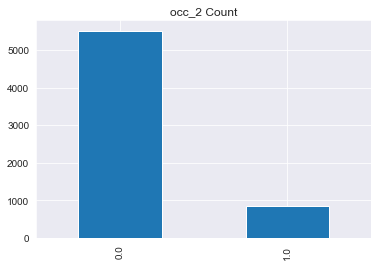

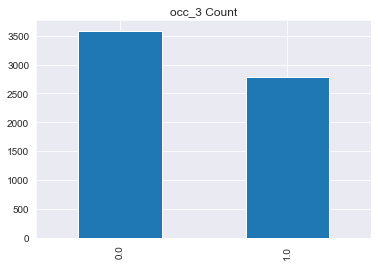

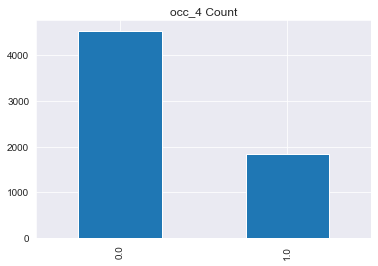

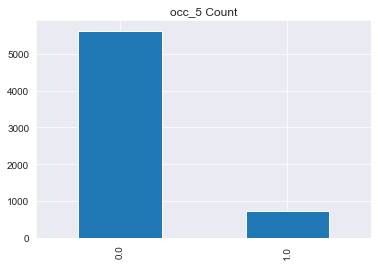

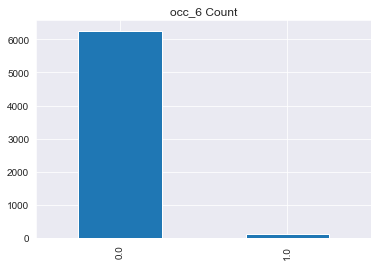

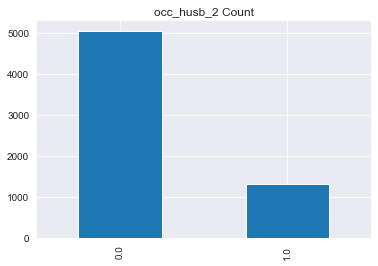

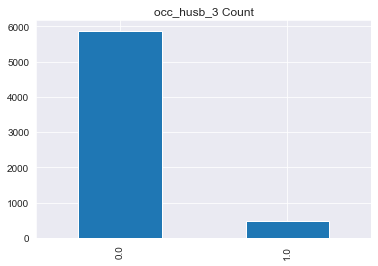

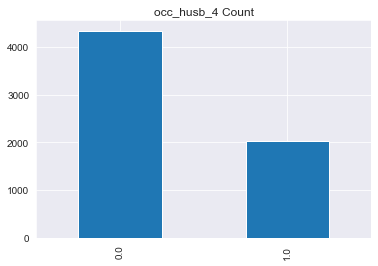

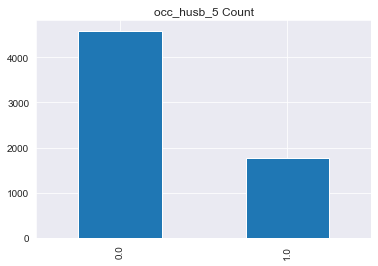

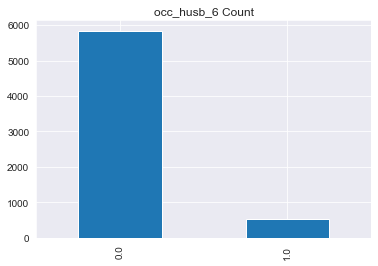

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
for i in cols_categorical:
    plt.title(i+" Count")
    X[i].value_counts().plot(kind="bar")
    plt.show()

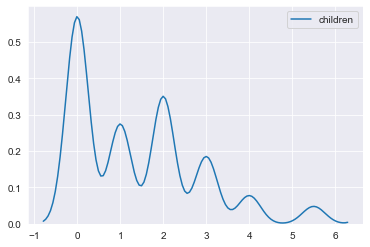

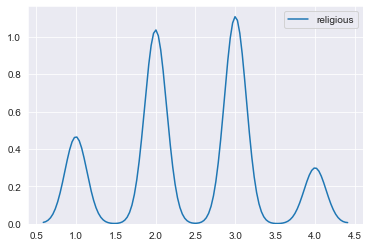

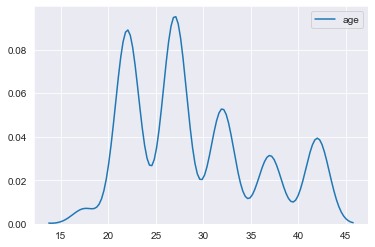

In [18]:
kdeplotting=["children","religious","age"]
for i in kdeplotting:
    sns.kdeplot(X[i])
    plt.show()

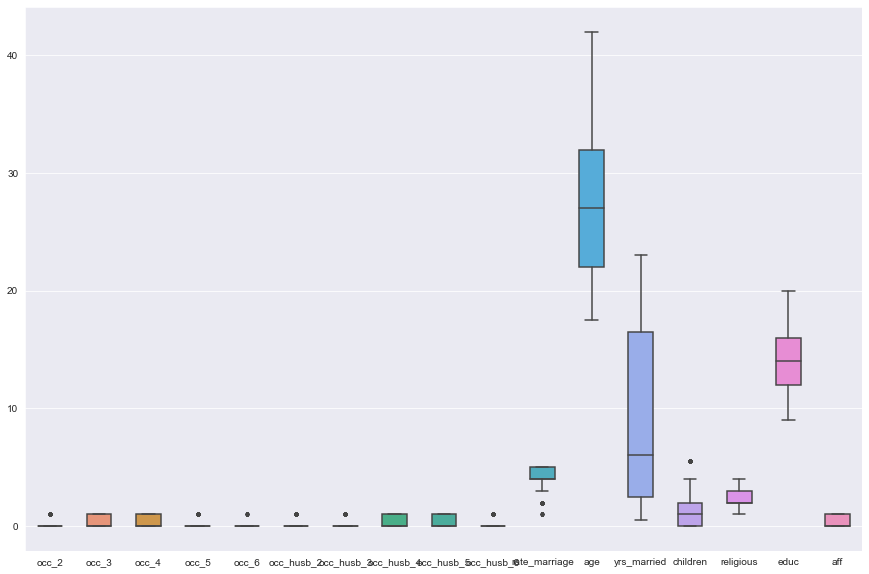

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

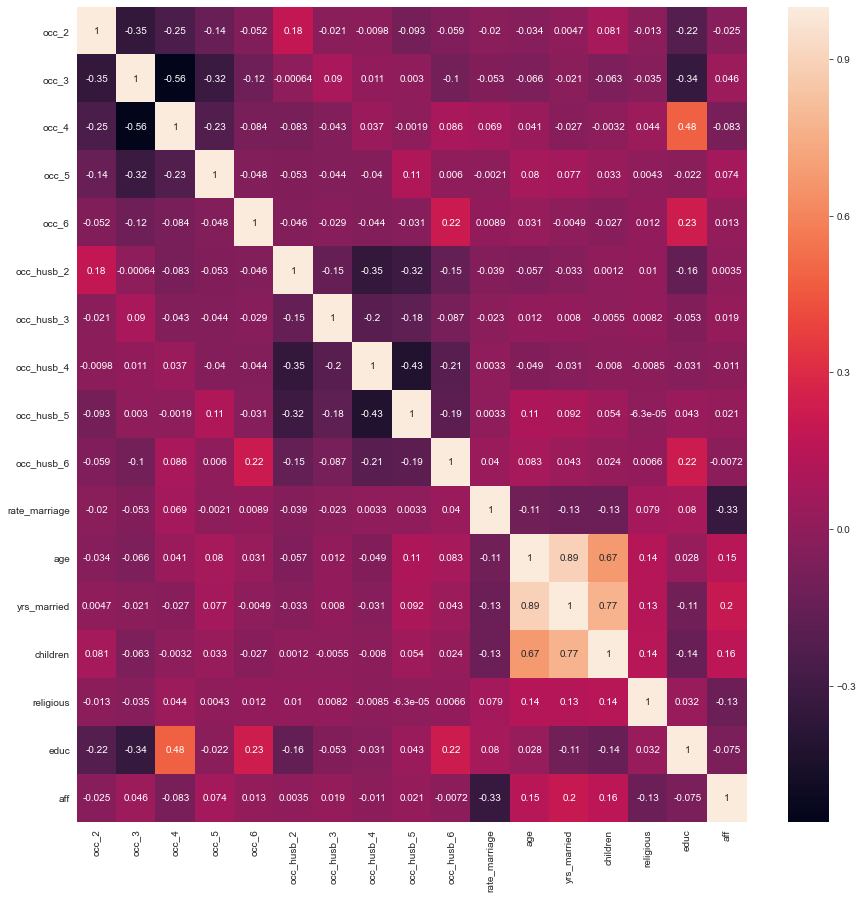

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)

No Multi-Colinearity Present

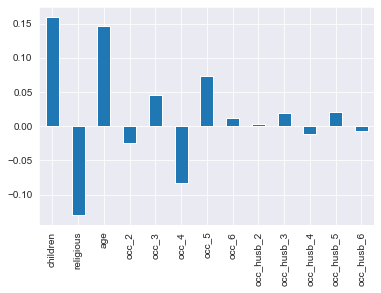

In [23]:
X[kdeplotting+cols_categorical].corrwith(X['aff']).plot(kind="bar")

Checking model by no modification on dataset

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X.drop('aff',axis=1),y)

In [30]:
from sklearn.linear_model import LogisticRegression
mdl=LogisticRegression()
mdl.fit(xtrain,ytrain)
mdl.score(xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Selecting most correlated features for modelling

In [56]:
X[kdeplotting+cols_categorical].corrwith(X['aff']).sort_values(ascending=False)

children      0.159833
age           0.146519
occ_5         0.073766
occ_3         0.045729
occ_husb_5    0.021181
occ_husb_3    0.018884
occ_6         0.012559
occ_husb_2    0.003474
occ_husb_6   -0.007204
occ_husb_4   -0.011295
occ_2        -0.024613
occ_4        -0.082706
religious    -0.129299
dtype: float64

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(X.drop('aff',axis=1)[[ 'occ_husb_4', 'occ_2', 'occ_4',
       'religious','children', 'age', 'occ_5', 'occ_3']],y)
#selecting top 5 and bottom 2 

In [58]:
mdl.fit(xtrain,ytrain)
mdl.score(xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.675251256281407

Checking model by modification on dataset by StandardScalar

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X.drop('aff',axis=1))
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,y)

In [33]:
mdl.fit(xtrain,ytrain)
mdl.score(xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7399497487437185

Selecting most correlated features for modelling with standard Scalar

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled[[ 'occ_husb_4', 'occ_2', 'occ_4',
       'religious','children', 'age', 'occ_5', 'occ_3']],y)
mdl.fit(xtrain,ytrain)
mdl.score(xtest,ytest)
#selecting top 5 and bottom 2 from here as well 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6846733668341709

Checking model by modification on dataset by MinMaxScalar

In [60]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X.drop('aff',axis=1))
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,y)
mdl.fit(xtrain,ytrain)
mdl.score(xtest,ytest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7204773869346733

Selecting most correlated features for modelling with MinMaxScalar

In [62]:
X_scaled=pd.DataFrame(data=X_scaled,columns=X.drop('aff',axis=1).columns)

In [63]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled[[ 'occ_husb_4', 'occ_2', 'occ_4',
       'religious','children', 'age', 'occ_5', 'occ_3']],y)
mdl.fit(xtrain,ytrain)
mdl.score(xtest,ytest)
#selecting top 5 and bottom 2 from here as well 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6658291457286433

### So by this we can find that Logistic Regression with Standard Scaling data is best